## IMPORT PACKAGES

In [1]:
import pandas as pd
import sys
from matplotlib import pyplot as plt
import pickle
import numpy as np

sys.path.append('../../')
from utils import microarray_utils, clustering_utils, bokeh_ui_utils, file_utils

/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/michaelbertagna/anaconda3/env

In [2]:
full_filtered_df = pd.read_csv('../microarray_probe_alignment_and_filtering/allgood_filt_agg_tidy_2021aligned_qc_rma_expression_full.csv')
full_filtered_df = full_filtered_df.rename(columns={'Unnamed: 0': 'TTHERM_ID'})
full_filtered_norm_df = microarray_utils.normalize_expression_per_gene(full_filtered_df, z=True)

num_genes = full_filtered_df.shape[0]
num_genes

19152

In [3]:
veg_cols = [col for col in full_filtered_norm_df.columns if col[0] != 'C']
veg_filtered_df = full_filtered_df[veg_cols]
veg_filtered_norm_df = microarray_utils.normalize_expression_per_gene(veg_filtered_df, z=True)
veg_filtered_norm_df.head()

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,S3_GSM285562,S6_GSM285543,S6_GSM285556,S6_GSM285563,S9_GSM285544,S9_GSM285564,S15_GSM285559,S15_GSM285566,S24_GSM285547,S24_GSM285560
0,TTHERM_000000042,0.751141,1.442370,0.721355,0.278148,0.760459,1.184709,-1.132654,0.580900,0.057505,...,0.702483,-1.440934,-2.018174,0.569708,-0.240262,0.842714,-0.632678,1.150520,1.128936,0.328309
1,TTHERM_000000045,-1.942607,-0.520051,-1.913441,-1.682122,-0.056722,-1.559907,-0.957965,-0.044903,-0.324799,...,0.454627,0.166687,0.508113,1.294557,0.908992,1.325394,0.897723,0.918837,0.833070,1.492450
2,TTHERM_00000020,-1.120566,-1.185826,-0.892373,0.530085,-0.799803,-1.101728,1.420017,-1.289715,-0.936240,...,-0.426768,1.261666,0.500680,-0.242402,0.240709,-0.322703,-0.674751,-0.791693,-0.341878,-0.694235
3,TTHERM_00000040,0.365304,-1.589932,-1.247049,1.436061,-1.262245,-0.515279,2.542492,-1.370087,-0.788060,...,0.299911,-0.259661,-0.785582,-0.636160,-0.447968,0.208053,0.121401,0.771628,0.656049,0.406095
4,TTHERM_000001189,0.696503,1.411737,1.046283,0.562587,1.360954,1.231138,0.038995,1.682030,1.492289,...,-0.489864,-1.606504,-1.075706,-0.665336,-1.515678,-0.198179,-0.339574,-0.056886,0.020734,-0.458472


In [4]:
np.min(veg_filtered_norm_df[veg_cols[1:]])

-4.276852022951554

In [5]:
sex_cols = [col for col in full_filtered_norm_df.columns if col[0] == 'C']
sex_filtered_df = full_filtered_df[['TTHERM_ID'] + sex_cols]
sex_filtered_norm_df = microarray_utils.normalize_expression_per_gene(sex_filtered_df, z=True)
sex_filtered_norm_df.head()

,TTHERM_ID,C0_GSM285570,C0_GSM656230,C4_GSM285574,C4_GSM285588,C4_GSM656234,C6_GSM285575,C6_GSM656232,C8_GSM285576,C8_GSM285590,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
0,TTHERM_000000042,-0.958420,-2.681966,1.169272,0.777432,-0.465909,0.143799,-0.605551,1.456431,1.201227,...,-0.601378,1.317495,1.048655,0.173842,-0.494733,0.011061,-1.116140,0.147272,-0.186051,-1.445530
1,TTHERM_000000045,1.510358,2.057306,0.051844,-0.371165,-0.914282,-1.087762,-0.408515,-1.354054,-1.919438,...,0.163620,0.968243,0.704005,-0.791082,0.705493,0.173556,-0.763598,1.326973,0.597993,-1.088065
2,TTHERM_00000020,3.017027,0.025496,-1.452164,0.219274,2.388246,-0.189914,-0.180888,-0.243877,-0.461868,...,-0.367881,-0.729420,0.229450,-0.356543,-0.428993,1.670793,-0.345062,-0.628738,-0.074517,-0.640928
3,TTHERM_00000040,1.583937,0.430974,0.888682,1.189068,0.995186,1.645989,0.977730,-0.424080,0.666321,...,-0.731235,-0.108165,-0.594634,-0.497380,0.193566,-0.024307,-0.371171,0.018558,0.321342,0.404860
4,TTHERM_000001189,-2.709373,-2.445194,1.167707,1.175257,1.035642,1.010913,1.101058,0.213092,0.766655,...,-0.784471,0.401252,0.153383,0.446995,-0.022960,-0.109801,0.431054,-0.833776,-0.548096,0.095179


In [6]:
np.max(sex_filtered_norm_df[sex_cols[1:]])

4.421417940131105

In [7]:
microarray_utils.get_arith_mean_expression(sex_filtered_norm_df)

,TTHERM_ID,C0,C4,C6,C8,C10,C12,C14,C16,C18
0,TTHERM_000000042,-1.820193,0.493599,-0.230876,1.328829,-0.344550,0.398971,0.846664,-0.533271,-0.494770
1,TTHERM_000000045,1.783832,-0.411201,-0.748138,-1.636746,0.491880,-0.127190,0.293722,0.038484,0.278967
2,TTHERM_00000020,1.521262,0.385119,-0.185401,-0.352873,-0.431146,-0.318360,-0.285504,0.298913,-0.448061
3,TTHERM_00000040,1.007456,1.024312,1.311860,0.121120,-1.800671,-1.231712,-0.400060,-0.067304,0.248254
4,TTHERM_000001189,-2.577284,1.126202,1.055986,0.489873,-0.253670,-0.273882,0.333877,0.099431,-0.428898
...,...,...,...,...,...,...,...,...,...,...
19147,YF00038369.t1,0.707032,0.472108,1.482190,-0.715933,-1.533368,-0.139081,-0.565615,0.268066,0.004575
19148,YF00038374.t1,-0.047736,1.710615,0.720499,0.386172,-0.107038,-0.089301,-0.130777,-1.135108,-0.990026
19149,YF00038376.t1,0.205423,-0.510885,-0.167027,-0.035219,-1.789998,-0.811251,0.462884,0.861967,1.188500
19150,YF00038377.t1,-0.185717,2.083808,0.317484,-0.562061,-0.731693,-0.421563,-0.302052,-0.071612,-0.513923


In [8]:
# import numpy as np
# import scipy.stats as st

# def normalizer(array):
#     """
#     Normalizes the values of an array to range from zero to one
#     """
    
#     a = np.array(array)
    
#     normalized = (array - np.min(array)) / (np.max(array) - np.min(array))
    
#     return normalized


# def z_normalizer(array):

#     """
#     Normalizes the values of an array to z-score from mean
#     """

#     # log_a = [np.log10(expr) for expr in array]
#     normalized = pd.Series(st.zscore(array))
#     return normalized


# def normalize_expression_per_gene(expression_df, z=False):
#     """
#     Function to normalize all gene expression to range from zero to one.
#     """
#     if 'TTHERM_ID' in expression_df.columns:
#         ttids = expression_df['TTHERM_ID'].values
#         data = expression_df[list(expression_df.columns)[1:]]

#         columns = expression_df.columns.tolist()

#         if z:
#             norm_expression_df = data.apply(lambda row: z_normalizer(row), axis=1)
#             norm_expression_df.columns = columns[1:]
        
#         else:
#             norm_expression_df = data.apply(lambda row: normalizer(row), axis=1)
        
#         norm_expression_df['TTHERM_ID'] = ttids
#         # norm_expression_df.columns = columns
        
        
#         columns = norm_expression_df.columns.tolist()
        
#         rearrangment = columns[-1:] + columns[:-1]
        
#         norm_expression_df = norm_expression_df[rearrangment]
        
#     else:

#         if z:
#             norm_expression_df = data.apply(lambda row: z_normalizer(row), axis=1)
#             norm_expression_df.columns = columns

#         else:
#             norm_expression_df = expression_df.apply(lambda row: normalizer(row), axis=1)
    
#     return norm_expression_df

In [9]:
# expression_df = full_filtered_df
# data = expression_df[list(expression_df.columns)[1:]]
# ttids = expression_df['TTHERM_ID'].values
# columns = expression_df.columns.tolist()

In [10]:
# normalize_expression_per_gene(full_filtered_df, z=True)

In [11]:
# columns

In [12]:
# data.apply(lambda row: normalizer(row), axis=1)

In [13]:
# data.apply(lambda row: z_normalizer(row), axis=1)

In [14]:
# import numpy as np
# import scipy.stats as st

# def get_arith_mean_expression(expression_df):
#     """
#     Function to take an expression dataframe from the microarrays and collapse it into the means of
#     all replicate chips.
#     """
#     # C2 and S12 got removed during quality control
#     x = [
#         'Ll', 
#         'Lm', 
#         'Lh', 
#         'S0', 
#         'S3', 
#         'S6', 
#         'S9', 
#         # 'S12', 
#         'S15', 
#         'S24', 
#         'C0', 
#         # 'C2', 
#         'C4', 
#         'C6', 
#         'C8', 
#         'C10', 
#         'C12', 
#         'C14', 
#         'C16', 
#         'C18']
    
#     # cols = expression_df.columns[1:]
#     # x = [c for c in x if c in cols]
    
#     condition_expr_dict = {c.split("_")[0]: [] for c in expression_df.columns[1:]}
    
#     for c in list(expression_df.columns)[1:]:
        
#         cond = c.split('_')[0]
#         if cond in condition_expr_dict.keys():
#             expr_list = condition_expr_dict.get(cond, [])

#             # Need to avoid true zeros
#             expr_list.append(expression_df[c].values)
#             condition_expr_dict[cond] = expr_list
        
#     condition_mean_dict = {c: np.mean(np.array(condition_expr_dict[c]), axis=0) for c in condition_expr_dict.keys() if c in x}
    
#     mean_expr_df = pd.DataFrame(condition_mean_dict)
#     mean_expr_df['TTHERM_ID'] = expression_df['TTHERM_ID'].values
#     cols = list(mean_expr_df.columns)
#     reorder = cols[-1:] + cols[:-1]
#     mean_expr_df = mean_expr_df[reorder]
    
#     return mean_expr_df

# def get_geom_mean_expression(expression_df):
#     """
#     Function to take an expression dataframe from the microarrays and collapse it into the means of
#     all replicate chips.
#     """
#     # C2 and S12 got removed during quality control
#     x = [
#         'Ll', 
#         'Lm', 
#         'Lh', 
#         'S0', 
#         'S3', 
#         'S6', 
#         'S9', 
#         # 'S12', 
#         'S15', 
#         'S24', 
#         'C0', 
#         # 'C2', 
#         'C4', 
#         'C6', 
#         'C8', 
#         'C10', 
#         'C12', 
#         'C14', 
#         'C16', 
#         'C18']
    
#     # cols = expression_df.columns[1:]
#     # x = [c for c in x if c in cols]
    
#     condition_expr_dict = {c.split("_")[0]: [] for c in expression_df.columns[1:]}
    
#     for c in list(expression_df.columns)[1:]:
        
#         cond = c.split('_')[0]
#         if cond in condition_expr_dict.keys():
#             expr_list = condition_expr_dict.get(cond, [])

#             # Need to avoid true zeros
#             expr_list.append(expression_df[c].values)
#             condition_expr_dict[cond] = expr_list
        
#     condition_mean_dict = {c: (st.mstats.gmean(np.array(condition_expr_dict[c]) + 1, 0) - 1) for c in condition_expr_dict.keys() if c in x}
    
#     mean_expr_df = pd.DataFrame(condition_mean_dict)
#     mean_expr_df['TTHERM_ID'] = expression_df['TTHERM_ID'].values
#     cols = list(mean_expr_df.columns)
#     reorder = cols[-1:] + cols[:-1]
#     mean_expr_df = mean_expr_df[reorder]
    
#     return mean_expr_df

In [15]:
# expression_df = full_filtered_norm_df

# x = [
#     'Ll', 
#     'Lm', 
#     'Lh', 
#     'S0', 
#     'S3', 
#     'S6', 
#     'S9', 
#     # 'S12', 
#     'S15', 
#     'S24', 
#     'C0', 
#     # 'C2', 
#     'C4', 
#     'C6', 
#     'C8', 
#     'C10', 
#     'C12', 
#     'C14', 
#     'C16', 
#     'C18']

# condition_expr_dict = {c.split("_")[0]: [] for c in expression_df.columns[1:]}

# for c in list(expression_df.columns)[1:]:
    
#     cond = c.split('_')[0]
#     if cond in condition_expr_dict.keys():
#         expr_list = condition_expr_dict.get(cond, [])

#         # Need to avoid true zeros
#         expr_list.append(expression_df[c].values)
#         condition_expr_dict[cond] = expr_list
    
# condition_mean_dict = {c: np.mean(np.array(condition_expr_dict[c]), axis=0) for c in condition_expr_dict.keys() if c in x}

In [16]:
# condition_mean_dict

In [17]:
full_filtered_norm_df

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
0,TTHERM_000000042,0.288786,0.765776,0.268232,-0.037607,0.295217,0.587974,-1.011146,0.171310,-0.189864,...,-0.480681,1.817354,1.495392,0.447719,-0.352963,0.252773,-1.097159,0.415899,0.016712,-1.491634
1,TTHERM_000000045,-2.588076,-0.950419,-2.554500,-2.288203,-0.417030,-2.147509,-1.454548,-0.403424,-0.725642,...,0.470089,0.976923,0.810478,-0.131281,0.811416,0.476348,-0.113969,1.202888,0.743701,-0.318351
2,TTHERM_00000020,-1.055142,-1.130404,-0.791977,0.848482,-0.685220,-1.033418,1.874801,-1.250214,-0.842567,...,-0.516732,-0.781353,-0.079528,-0.508433,-0.561462,0.975435,-0.500030,-0.707661,-0.302010,-0.716584
3,TTHERM_00000040,0.749737,-1.012130,-0.703158,1.714598,-0.716851,-0.043758,2.711606,-0.814027,-0.289562,...,-1.100621,-0.536737,-0.976995,-0.888980,-0.263667,-0.460844,-0.774760,-0.422050,-0.148029,-0.072443
4,TTHERM_000001189,-0.377774,-0.046772,-0.215900,-0.439750,-0.070273,-0.130351,-0.682063,0.078317,-0.009493,...,0.040025,1.083747,0.865564,1.124013,0.710338,0.633898,1.109981,-0.003376,0.248092,0.814329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,YF00038369.t1,-0.948701,1.006643,-0.753211,-0.112007,0.473345,0.496838,-0.471972,0.056905,-0.201759,...,0.201359,-1.596915,-1.553445,0.487916,-0.301939,-0.946659,1.415327,-0.845751,-0.606985,0.725283
19148,YF00038374.t1,-2.152473,-1.483413,-2.169219,-0.915728,-2.018036,-1.412816,-0.634323,-1.543116,-1.720486,...,0.398846,0.432977,0.193962,1.104747,-0.283537,0.302151,-0.294685,-0.698299,0.346944,0.365318
19149,YF00038376.t1,-0.055358,1.586466,0.678356,0.520574,0.821275,0.625433,1.597859,1.612879,1.093598,...,-0.954965,0.754752,0.803188,-0.542649,1.108638,0.972429,0.170104,1.307818,1.955991,-0.001430
19150,YF00038377.t1,0.116854,0.495125,0.369181,0.635197,0.285647,0.383839,1.688914,-0.226865,-0.360212,...,-0.191681,-0.171261,-0.793810,0.175478,-0.229383,-0.568156,0.858316,-0.885547,-1.670871,0.984977


In [18]:
# get_arith_mean_expression(full_filtered_norm_df)

# LEIDEN CLUSTERING

In [19]:
phases_list = ['full', 'veg', 'sex']
phases = 'full'

In [20]:
metric = 'manhattan'
# metric='minkowski_3.0'

resolution_param=0.005
# resolution_param=0.0001

n_neighbors = 3

dataset = 'microarray'

In [21]:
# Moving normalization from within the function to before the function
leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
    full_filtered_norm_df,
    dataset,
    metric=metric,
    n_neighbors=n_neighbors, 
    resolution_param=resolution_param, 
    partition_type = 'EXP', 
    n_jobs = -1, 
    random_state=42
    )

In [22]:
full_filtered_norm_df.head()

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
0,TTHERM_000000042,0.288786,0.765776,0.268232,-0.037607,0.295217,0.587974,-1.011146,0.171310,-0.189864,...,-0.480681,1.817354,1.495392,0.447719,-0.352963,0.252773,-1.097159,0.415899,0.016712,-1.491634
1,TTHERM_000000045,-2.588076,-0.950419,-2.554500,-2.288203,-0.417030,-2.147509,-1.454548,-0.403424,-0.725642,...,0.470089,0.976923,0.810478,-0.131281,0.811416,0.476348,-0.113969,1.202888,0.743701,-0.318351
2,TTHERM_00000020,-1.055142,-1.130404,-0.791977,0.848482,-0.685220,-1.033418,1.874801,-1.250214,-0.842567,...,-0.516732,-0.781353,-0.079528,-0.508433,-0.561462,0.975435,-0.500030,-0.707661,-0.302010,-0.716584
3,TTHERM_00000040,0.749737,-1.012130,-0.703158,1.714598,-0.716851,-0.043758,2.711606,-0.814027,-0.289562,...,-1.100621,-0.536737,-0.976995,-0.888980,-0.263667,-0.460844,-0.774760,-0.422050,-0.148029,-0.072443
4,TTHERM_000001189,-0.377774,-0.046772,-0.215900,-0.439750,-0.070273,-0.130351,-0.682063,0.078317,-0.009493,...,0.040025,1.083747,0.865564,1.124013,0.710338,0.633898,1.109981,-0.003376,0.248092,0.814329


In [23]:
leiden_label_df_round_1_arranged = bokeh_ui_utils.arrange_modules(full_filtered_norm_df, leiden_label_df_round_1, phases) 
leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)
leiden_label_df_round_1_arranged_sorted.to_csv('./test_nn3_leiden_label_df_round_1.csv', index=False)

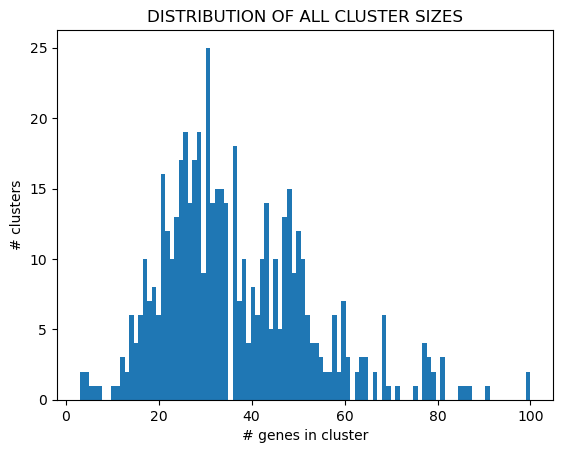

In [24]:
plt.hist(cluster_sizes, max(cluster_sizes))
plt.title('DISTRIBUTION OF ALL CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

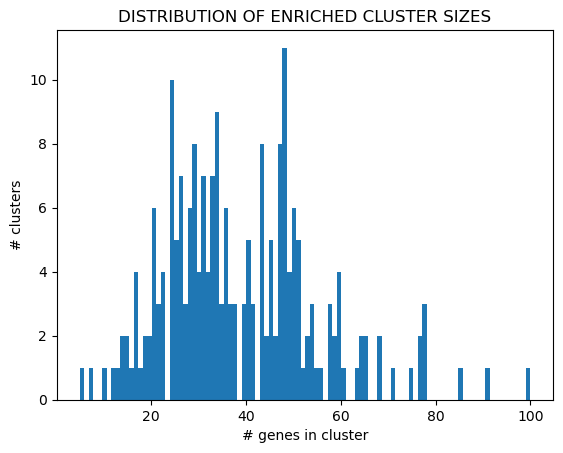

In [25]:
plt.hist(enriched_cluster_sizes, max(enriched_cluster_sizes))
plt.title('DISTRIBUTION OF ENRICHED CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

In [26]:
key_lens = [len(k) for k in partition_stats.keys()]
max_key_len = max(key_lens)

for k, v in partition_stats.items():
    print(f'{" " * (max_key_len - len(k))}{k}:', v)

              partition_type: EXP
              dimensionality: baseline
                      metric: manhattan
                       graph: umap_fuzzy_simplicial_set
                         nns: 3
                  clustering: leiden_cpm
                   parameter: 0.005
            silhouette_score: -0.03207237797185188
                  modularity: 0.731594496331647
                   nclusters: 522
           mean_cluster_size: 36.689655172413794
         median_cluster_size: 33.5
             sd_cluster_size: 16.01147362426574
          nenriched_clusters: 214
  mean_enriched_cluster_size: 38.742990654205606
median_enriched_cluster_size: 36.0
    sd_enriched_cluster_size: 16.154751693261666
     nenriched_cluster_genes: 8291
                    datetime: 2024-05-08 14:36:58.110540


In [27]:
enrich_full_nn3 = clustering_utils.compute_enrichment(leiden_label_df_round_1_arranged_sorted)

In [28]:
outfile='../enrichment/test_nn3_full_enrichment.csv'
enrich_full_nn3.to_csv(outfile, index=False)

In [29]:
complete_annot = pd.read_csv('../eggnog/complete_eggnog_annotation.csv')

In [30]:
palette45 = """
#51635F\n#FF1C16\n#16FC26\n#403DFC\n#FE0DCE\n#F9AA00\n#00FFD5\n#22BFFE\n#BB3551\n#E6FE97\n#ECADFF\n#FFBFBD\n#CF00F5\n#0D8B00\n#D7FEFF\n#8D7200\n#F76C00\n#AD3288\n#5C5AB8\n#FC0080\n#B8FF16\n#00AAB4\n#FBE11C\n#9AAAD9\n#8BBB8C\n#934B47\n#6EFE99\n#9C6D91\n#FB9778\n#9D32AF\n#D40087\n#FFDC9D\n#FF8DB6\n#A96AFC\n#FDDDFB\n#168CF7\n#FD6CF9\n#F64553\n#4D6A00\n#FAFEDB\n#A7977D\n#0DFBFF\n#86B80D\n#FD8AE4\n#B7B126
""".split()

palette32 = """
white\n#F91622\n#16FC0D\n#5138FB\n#FD00CF\n#FDD51C\n#16FDD7\n#FC8B8E\n#16BFFF\n#DF9BFD\n#669C2A\n#FEE7C4\n#F31685\n#DF16FD\n#C1F1FE\n#A23D7E\n#D5FD0D\n#8C5A0D\n#FC790D\n#4F5CBC\n#FFCBEF\n#168D72\n#68FA93\n#C4FDC9\n#F7A449\n#16789B\n#AD0DAB\n#C4262E\n#0DF1FF\n#EFF994\n#B6C1FE\n#8F22CD
""".split()

palette35 = """
#585F6A\n#FE1626\n#00FB0D\n#2E40FC\n#FD0DCE\n#FCD200\n#F7868C\n#16FFDC\n#22BEFB\n#D28EF6\n#609000\n#FFE7C9\n#F51683\n#FF730D\n#CAFE16\n#AA3586\n#BEEEFD\n#BD00FA\n#895D22\n#FEC7F0\n#495AA1\n#73F995\n#229270\n#ED963B\n#F6FE97\n#C5FFD0\n#C50DC8\n#6993FF\n#C22A35\n#16ECFC\n#AA707E\n#7A3BCB\n#7C845C\n#358FAA\n#BDBAF6
""".split()

palette38 = """
#636265\n#F60D16\n#00F90D\n#3540FB\n#FD0DD0\n#FDDB0D\n#00FFE2\n#FA8884\n#2ABEFE\n#E5A3FF\n#518F00\n#FEFDD5\n#D51CFF\n#ED007F\n#A33879\n#96731C\n#C8FB16\n#C0ECFE\n#FBC1DA\n#5658BA\n#F96900\n#F69F1C\n#58FA9C\n#008E72\n#BA22B9\n#167D97\n#794D8A\n#CEFE9C\n#BB222E\n#954D45\n#00DCEF\n#FD66B0\n#B2FDD3\n#FDBD9F\n#A9B4F1\n#B371FE\n#849566\n#2A8EFF
""".split()

palette64 = """
white\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

palette65 = """
white\ngainsboro\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

In [31]:
palette36 = ["#FFFFFF", 
             "#E4E1E3", 
             "#F6222E", 
             "#FE00FA", 
             "#16FF32", 
             "#3283FE", 
             "#FEAF16", 
             "#B00068", 
             "#1CFFCE",
             "#90AD1C", 
             "#2ED9FF", 
             "#DEA0FD", 
             "#AA0DFE", 
             "#F8A19F", 
             "#325A9B", 
             "#C4451C", 
             "#1C8356", 
             "#85660D",
             "#B10DA1", 
             "#FBE426", 
             "#1CBE4F", 
             "#FA0087", 
             "#FC1CBF", 
             "#F7E1A0", 
             "#C075A6", 
             "#782AB6", 
             "#AAF400",
             "#BDCDFF", 
             "#822E1C", 
             "#B5EFB5", 
             "#7ED7D1", 
             "#1C7F93", 
             "#D85FF7", 
             "#683B79", 
             "#66B0FF", 
             "#3B00FB",
             "magenta"]

change index 5 to #778899. Change index 9 to #2F4F4F. Add #FF7F50. Change index 9 to #FFBCD9. Change index 14 to #DEA5A4

In [32]:
palette27 = ["#FFFFFF", 
             "#AA0DFE", 
             "#3283FE", 
             "#85660D", 
             "#782AB6", 
             "#778899", 
             "#1C8356", 
             "#16FF32", 
             "#F7E1A0", 
#              "#2F4F4F",
             "#FFBCD9", 
             "#C4451C", 
             "#DEA0FD", 
             "#FE00FA", 
#              "#325A9B", 
             "#FEAF16", 
             "#DEA5A4", 
             "#90AD1C", 
             "#F6222E",
             "#1CFFCE", 
             "#2ED9FF", 
             "#B10DA1", 
#              "#C075A6", 
#              "#FC1CBF", 
#              "#B00068", 
             "#FBE426", 
             "#FA0087",
             "#FF7F50"
            ]

In [33]:
with open(('colors_2000_1'), 'rb') as file:
    color_palette_raw = pickle.load(file)

color_palette = palette65

if len(color_palette_raw) >= max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1:
    color_palette = color_palette_raw[:max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1]

In [34]:
import numpy as np
cols = full_filtered_norm_df.columns
np.min(full_filtered_norm_df[cols[1:]].values)

-6.202967337930747

In [35]:
# import numpy as np
# from bokeh.models import Button, ColumnDataSource, CustomJS
# from bokeh.plotting import Column, figure, show

# x = np.linspace(0, 20, 200)
# y = x**2

# source = ColumnDataSource(data=dict(x=x, y=y))

# p = figure(tools="xpan")
# p.line("x", "y", source=source)

# button = Button()
# button.js_on_click(
#     CustomJS(args={"xr": p.x_range, "yr": p.y_range, "source": source}, code="""
#         const i = Math.max(source.data.x.findIndex((x) => x > xr.start), 0)

#         const j0 = source.data.x.findIndex((x) => x > xr.end)
#         const j = j0 >= 0 ? j0 : source.data.x.length - 1

#         const ysub = source.data.y.slice(i, j)

#         yr.start = Math.min.apply(null, ysub);
#         yr.end = Math.max.apply(null, ysub);
#     """)
# )

# show(Column(p, button))

In [36]:
import os

embedding_metric='manhattan'

dashboard_path = file_utils.generate_uniquely_numbered_export_path('./plots/', 'dashboard', '.html', tags=['microarr', 'umap', metric, f'{n_neighbors}nn', f'{resolution_param}rp'])

p = bokeh_ui_utils.generate_and_save_umap(dashboard_path, full_filtered_norm_df, complete_annot, leiden_label_df_round_1_arranged_sorted, phases, color_palette, os.path.basename(dashboard_path), expr_min=-3, expr_max=3, n_neighbors=n_neighbors, embedding_metric=embedding_metric)

/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/michaelbertagna/git/TGNE-2022/TGNE/embedding/../../utils/bokeh_ui_utils.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm_df['module'] = hover_data['module'].values


./plots/dashboard329_microarr_umap_manhattan_3nn_0.005rp.html


In [37]:
def run_over_all_phases(metric='manhattan', 
                        resolution_param=0.005, 
                        n_neighbors=3,
                        dataset='microarray'
                        ):


    with open(('colors_2000_1'), 'rb') as file:
        color_palette_raw = pickle.load(file)

    color_palette = palette65

    complete_annot = pd.read_csv('../eggnog/complete_eggnog_annotation.csv')
    phases_list = ['full', 'veg', 'sex']

    full_filtered_df = pd.read_csv('../microarray_probe_alignment_and_filtering/allgood_filt_agg_tidy_2021aligned_qc_rma_expression_full.csv')

    full_filtered_df = full_filtered_df.rename(columns={'Unnamed: 0': 'TTHERM_ID'})

    full_filtered_norm_df = microarray_utils.normalize_expression_per_gene(full_filtered_df, z=True)

    veg_cols = [col for col in full_filtered_norm_df.columns if col[0] != 'C']
    veg_filtered_df = full_filtered_df[veg_cols]
    veg_filtered_norm_df = microarray_utils.normalize_expression_per_gene(veg_filtered_df, z=True)

    sex_cols = [col for col in full_filtered_norm_df.columns if col[0] == 'C']
    sex_filtered_df = full_filtered_df[['TTHERM_ID'] + sex_cols]
    sex_filtered_norm_df = microarray_utils.normalize_expression_per_gene(sex_filtered_df, z=True)

    metric = metric
    # metric='minkowski_3.0'

    resolution_param=resolution_param
    # resolution_param=0.0001

    n_neighbors = n_neighbors

    dataset = dataset



    for phase, df, ndf in zip(phases_list, [full_filtered_df, veg_filtered_df, sex_filtered_df], [full_filtered_norm_df, veg_filtered_norm_df, sex_filtered_norm_df]):

        leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
            df,
            dataset,
            metric=metric,
            n_neighbors=n_neighbors, 
            resolution_param=resolution_param, 
            partition_type = 'EXP', 
            n_jobs = -1, 
            random_state=42
        )

        
        leiden_label_df_round_1_arranged = bokeh_ui_utils.arrange_modules(
            full_filtered_norm_df, 
            leiden_label_df_round_1, 
            phases
        )

        leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)

        leiden_label_df_round_1_arranged_sorted.to_csv('./test_nn3_leiden_label_df_round_1.csv', index=False)

        enrich_full_nn3 = clustering_utils.compute_enrichment(leiden_label_df_round_1_arranged_sorted)

        outfile='../enrichment/test_nn3_full_enrichment.csv'
        enrich_full_nn3.to_csv(outfile, index=False)

        embedding_metric='manhattan'

        dashboard_path = file_utils.generate_uniquely_numbered_export_path('./plots/', 'dashboard', '.html', tags=['microarr', 'umap', metric, f'{n_neighbors}nn', f'{resolution_param}rp'])

        if len(color_palette_raw) >= max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1:
            color_palette = color_palette_raw[:max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1]

        p = bokeh_ui_utils.generate_and_save_umap(dashboard_path, ndf, complete_annot, leiden_label_df_round_1_arranged_sorted, phase, color_palette, os.path.basename(dashboard_path), expr_min=-3, expr_max=3, n_neighbors=n_neighbors, embedding_metric=embedding_metric)

    

    
    

In [38]:
run_over_all_phases()

/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/michaelbertagna/git/TGNE-2022/TGNE/embedding/../../utils/bokeh_ui_utils.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm_df['module'] = hover_data['module'].values


./plots/dashboard330_microarr_umap_manhattan_3nn_0.005rp.html


/Users/michaelbertagna/git/TGNE-2022/TGNE/embedding/../../utils/bokeh_ui_utils.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm_df['module'] = hover_data['module'].values


./plots/dashboard331_microarr_umap_manhattan_3nn_0.005rp.html


/Users/michaelbertagna/git/TGNE-2022/TGNE/embedding/../../utils/bokeh_ui_utils.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm_df['module'] = hover_data['module'].values


./plots/dashboard332_microarr_umap_manhattan_3nn_0.005rp.html


In [39]:
mucocyst_cluster = [
'YF00036312.t1',
'YF00012829.t1',
'YF00000889.t1',
'TTHERM_00527180',
'TTHERM_00335830',
'YF00012830.t1',
'YF00009126.t1',
'YF00005954.t1',
'YF00005804.t1',
'TTHERM_01055600',
'TTHERM_00624720',
] # TTHERM_00630470: mucocyst gene with drastically different expression profile

In [40]:
print(','.join(mucocyst_cluster))

YF00036312.t1,YF00012829.t1,YF00000889.t1,TTHERM_00527180,TTHERM_00335830,YF00012830.t1,YF00009126.t1,YF00005954.t1,YF00005804.t1,TTHERM_01055600,TTHERM_00624720


In [41]:
clustering_utils.fraction_max_same_cluster_genes(mucocyst_cluster, leiden_label_df_round_1_arranged_sorted)

7 / 7 = 1.0
           TTHERM_ID  label
18756  YF00036312.t1    401
15857  YF00012830.t1    401
15856  YF00012829.t1    401
15327  YF00009126.t1    401
14900  YF00005954.t1    401
14894  YF00005804.t1    401
14226  YF00000889.t1    401
YF00036312.t1,YF00012830.t1,YF00012829.t1,YF00009126.t1,YF00005954.t1,YF00005804.t1,YF00000889.t1


1.0